# 최적화 (Optimize)
- 모델이 예측한 결과와 실제 값의 차이를 줄이기 위해서 모델을 수정해야 하는 작업을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

## 최적화 문제 : 손실을 적게해주는 W 값을 찾는 것 
- 손실함수 f(w) 의 값을 최소화(또는 최대화) 하는 변수 w(파라미터)를 찾는 것.  W 모델이 최적화 시켜야 하는 것  W에 의해서 손실이 계산. 손실을 적게해주는 w를 찾는 값을 찾는것 


$$
w_{i} = \arg \min_w f(w)  : w_{i}의 값이 min이 나올 수 있게 하는 w의 값
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun gothic'  # 한글 깨지지 않게 처리
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스가 깨지지 않게 처리


#C:\Users\eui03\anaconda3\envs\ml2\Lib\site-packages\matplotlib\mpl-data\matplotlibrc matplotlib 환경설정파일에서 변경가능. 
#C:\Users\<<사용자계정명>>\anaconda3\envs\ml\Lib\site-packages\matplotlib\mpl-data\matplotlibrc matplotlib 환경설정파일 에서 변경가능.


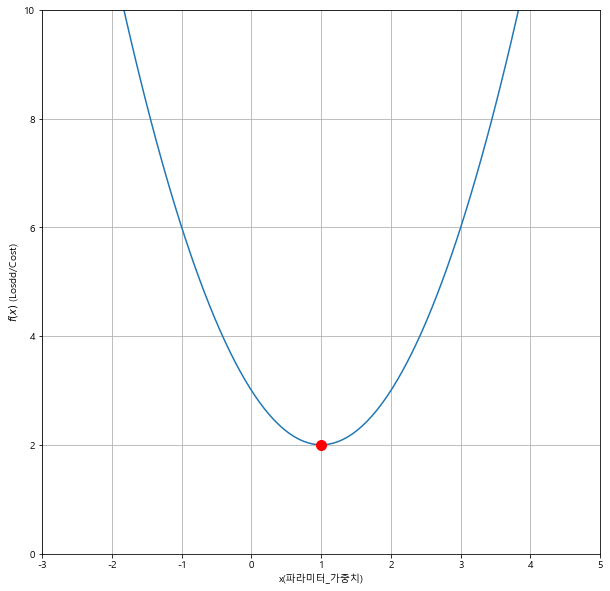

In [10]:
def loss_func(x): #x =>파라미터
    return (x-1)**2 + 2 

plt.figure(figsize=(10,10))
xx = np.linspace(-3,4, 100)
# xx.shape, f1(xx).shape
plt.plot(xx, loss_func(xx))
plt.plot(1,2, 'ro', markersize=10)
plt.ylim(0,10)
plt.xlim(-3,5)
plt.xlabel('x(파라미터_가중치)')
plt.ylabel('$f(x)$ (Losdd/Cost)')
plt.grid(True)
plt.show()

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 오차를 정의하는 함수
- 이 함수를 최소화 하는 값을 찾는 것이 최적화의 목적

## 최적화 문제를 해결하는 방법
- 최소값을 찾는 함수(공식)을 찾는다.
    - 공식을 찾을 수 없는 경우가 있다.
    - feature와 sample 수가 많아 질 수록 계산량이 급증한다.
- 경사하강법 (Gradient Descent)    
    - 값을 조금씩 조금씩 조정해나가면서 최소값을 찾는다.

## 경사하강법 (Gradient Descent)
- 다양한 종류의 문제에서 최적의 해법을 찾을 수 있는 **일반적인 최적화 알고리즘**
- 비용함수를 최소화하는 파라미터를 찾기위해 반복해서 조정해 나간다. 
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 gradient(경사,기울기)를 계산한다.
    - gradient가 감소하는 방향으로 벡터 $W$를 조정한다.
    - gradient가 0이 될때 까지 반복한다.

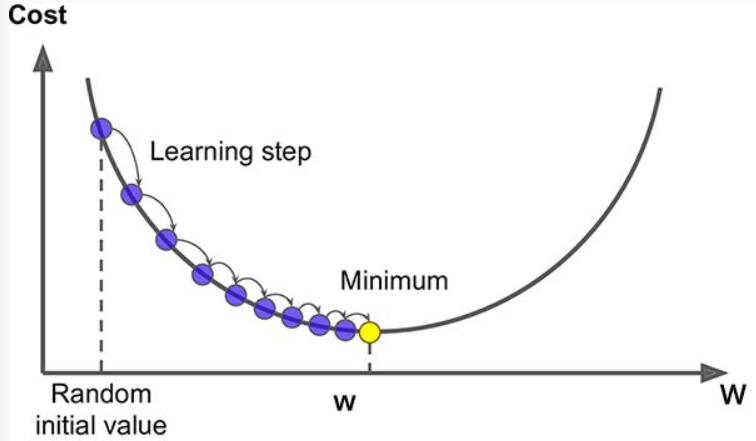

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다.
    - 학습률을 너무 작게 잡으면 최소값에 수렴하기 위해 많은 반복을 진행해야해 시간이 오래걸린다.
    - 학습률을 너무 크게 잡으면 왔다 갔다 하다가 오히려 더 큰 값으로 발산하여 최소값에 수렴하지 못하게 된다.

In [11]:
def f(x):
    return (x-1)**2 + 2 

In [12]:
# 함수 f의 도함수
def fd(x):
    return 2*(x-1)

1차시도: w=0.00, 기울기 = -2.00


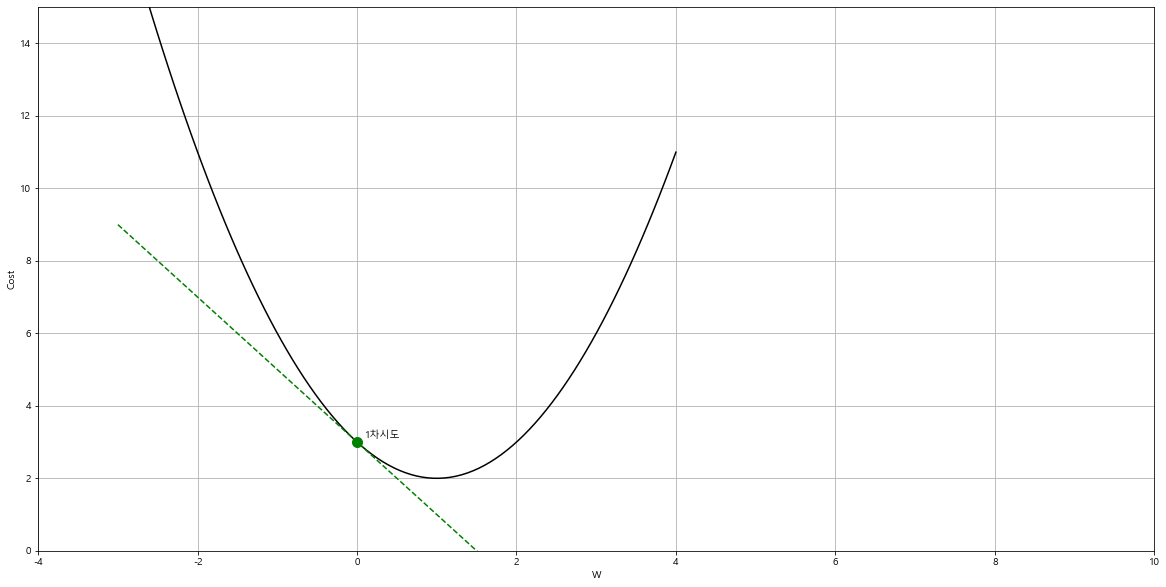

In [14]:
X = np.linspace(-3,4, 100)

plt.figure(figsize=(20,10))
plt.plot(X, f(X), 'k-')

learning_rate = 0.4 # 5차시에 w가 0이 나오는 값 찾음
# learning_rate = 0.01 # rate이 너무 작아서 반복해야 함 오래 걸린다. 
# learning_rate = 1.1 # 학습률이 너무 큰 값인 경우에는 발산해서 최적은 파라미터를 찾지 못할 수 있다. 

# w: 조정할 가중치
w = 0  # 초기의 W는 렌덤하게 잡는다.
plt.plot(w, f(w), 'go', markersize=10)
plt.text(w+0.1, f(w)+0.1, '1차시도')
plt.plot(X, fd(w)*(X) + f(w), 'g--')
print('1차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

# w = w - learning_rate*fd(w)
# plt.plot(w, f(w), 'ro', markersize=10)
# plt.text(w+0.1, f(w)+0.1, '2차시도')
# plt.plot(X, fd(w)*(X-w) + f(w), 'r--')
# print('2차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

# w = w - learning_rate*fd(w)
# plt.plot(w, f(w), 'bo', markersize=10)
# plt.text(w+0.1, f(w)+0.1, '3차시도')
# plt.plot(X, fd(w)*(X-w) + f(w), 'b--')
# print('3차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))


# w = w - learning_rate*fd(w)
# plt.plot(w, f(w), 'mo', markersize=10)
# plt.text(w+0.1, f(w)+0.1, '4차시도')
# plt.plot(X, fd(w)*(X-w) + f(w), 'm--')
# print('4차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))


# w = w - learning_rate*fd(w)
# plt.plot(w, f(w), 'co', markersize=10)
# plt.text(w+0.1, f(w)+0.1, '5차시도')
# plt.plot(X, fd(w)*(X-w) + f(w), 'c--')
# print('5차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

# w = w - learning_rate*fd(w)
# plt.plot(w, f(w), 'yo', markersize=10, alpha=0.5)
# plt.text(w+0.1, f(w)+0.1, '6차시도')
# plt.plot(X, fd(w)*(X-w) + f(w), 'y--')
# print('6차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

plt.ylim(0,15)
plt.xlim(-4,10)
plt.xlabel('W')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [ ]:
w=0  
fd(w)=0
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)
w= w- learning_rate*fd(w)

In [28]:
w= np.random.randint(-5,5) #w : 파라미터(가중치 -weight) W를 -5 와 5 사이의 렌덤 값을 사용해라 
#learning_rate =0.1
learning_rate =0.4
cnt = 0 #반복횟수 
w_list = [w]
while True: 
    if fd(w) ==0: #변화율(기울기)이 0 이면
        break
    if cnt == 100:  # 최대 100번만 반복
        break 
    w = w-learning_rate*fd(w)
    w_list.append(w)
    cnt +=1
       

In [30]:
#0.1
#print("learning_rate 0.1: count",cnt, w_list)
#0.4
print("learning_rate 0.4: count",cnt, w_list)

learning_rate 0.4: count 25 [-3, 0.20000000000000018, 0.8400000000000001, 0.968, 0.9936, 0.99872, 0.999744, 0.9999488, 0.99998976, 0.999997952, 0.9999995904, 0.99999991808, 0.999999983616, 0.9999999967232, 0.99999999934464, 0.999999999868928, 0.9999999999737856, 0.9999999999947571, 0.9999999999989514, 0.9999999999997903, 0.999999999999958, 0.9999999999999916, 0.9999999999999983, 0.9999999999999997, 0.9999999999999999, 1.0]


In [15]:
np.random.randint(-5,5) #초기값


-4